# <font color='green'> Logistic Regression on SKLearn BreastCancer dataset </font>
###     <font color='blue'> Machine Learning Course - Dr.Manthouri </font>
###     <font color='blue'> Saeed Alikhani M.Sc Student at IAUTNB</font>

***
# <font color='green'> Introduction </font>
##### In this project we are going to use <b> Logistic Regression </b> on SKLearn <b> BreastCancer Dataset </b>.
##### We will do this step by step according to the following list: 
##### <font color='red'> 1- Configuring Enviorment </font>
##### <font color='red'> 2- EDA and Data Analysing </font>
##### <font color='red'> 3- Creating and Training Model </font>

***
# <font color='green'> Configuring Enviorment </font>
## 1. Load Libraries

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## 2. Dataset Configuration
### a. Load dataset and Creating an object of it

In [130]:
from sklearn.datasets import load_breast_cancer
brc = load_breast_cancer()

### b. Checking the structure of dataset
#### Dataset keys

In [131]:
brc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Dataset Descriptions

In [132]:
print(brc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Checking the shape of dataset

In [133]:
brc.data.shape

(569, 30)

#### Creating DataFrame from dataset features

In [134]:
brc_df = pd.DataFrame(brc.data , columns= brc.feature_names)
brc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Adding <b>"Target"</b> col to DataFrame as <b> "result" </b>

In [135]:
brc_df['result'] = brc.target
brc_df['result'] = brc_df['result'].map({1:0,0:1})
brc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### Checking Target Types

In [136]:
print(brc.target_names)

['malignant' 'benign']


In [137]:
#Representation of "target_names" by DataFrame.
brc_target_df = pd.DataFrame(brc.target_names , columns=['Type Name'])

#Adding the "0,1" values as real meaning of "target_names" in DataFrame.
brc_target_df['Boolean Value'] = ([1,0])
brc_target_df.head().T

,0,1
Type Name,malignant,benign
Boolean Value,1,0


#### Checking Describe of DataFrame <font color='red'> (brc_df) </font>

In [138]:
brc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Checking counts of each state in Data <font color='red'> (brc_df) </font>

In [139]:
brc_df['result'].value_counts()

0    357
1    212
Name: result, dtype: int64

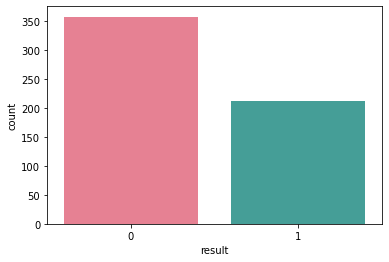

In [140]:
#Representation ovalue_counts count as plot;
sns.countplot(x = brc_df['result'],palette='husl');

#### Checking counts of <font color='red'> NULL </font> Values in <font color='red'> (brc_df) </font>
##### If there were any kind of <font color='red'> NULL </font> Values we have to delete them and then continue the process!

In [141]:
brc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
result                     0
dtype: int64

***
# <font color='green'> EDA and Data Analysing </font>
## 1. Correlations of Data with HeatMap

<AxesSubplot:>

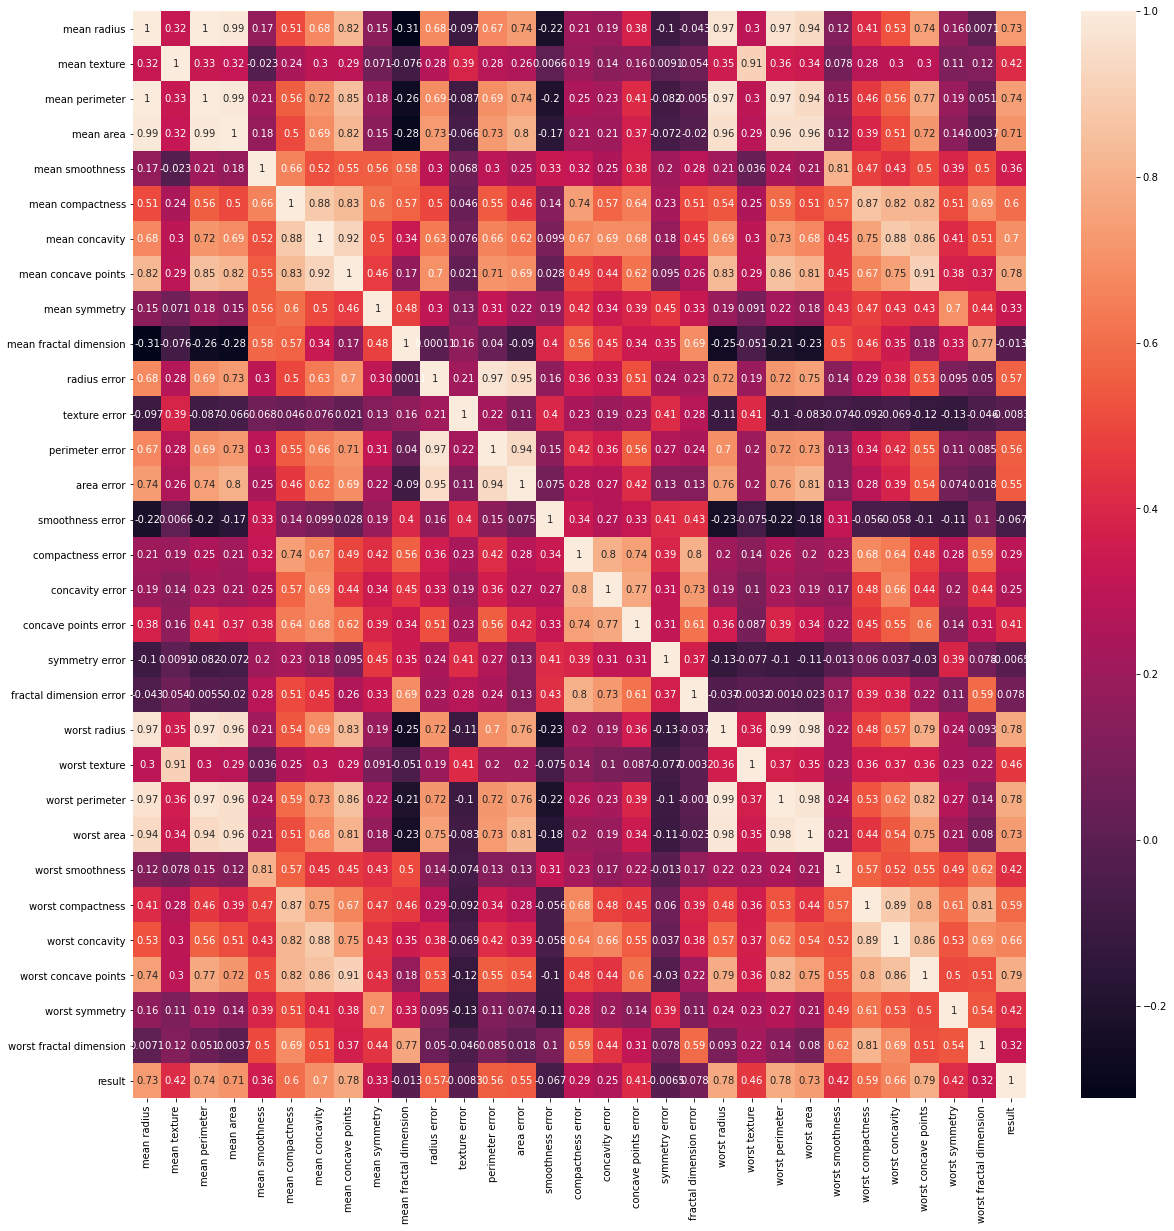

In [144]:
plt.figure(figsize=(20,20))
sns.heatmap(brc_df.corr(),annot=True)

## 2. Correlations of Data with PairPlot

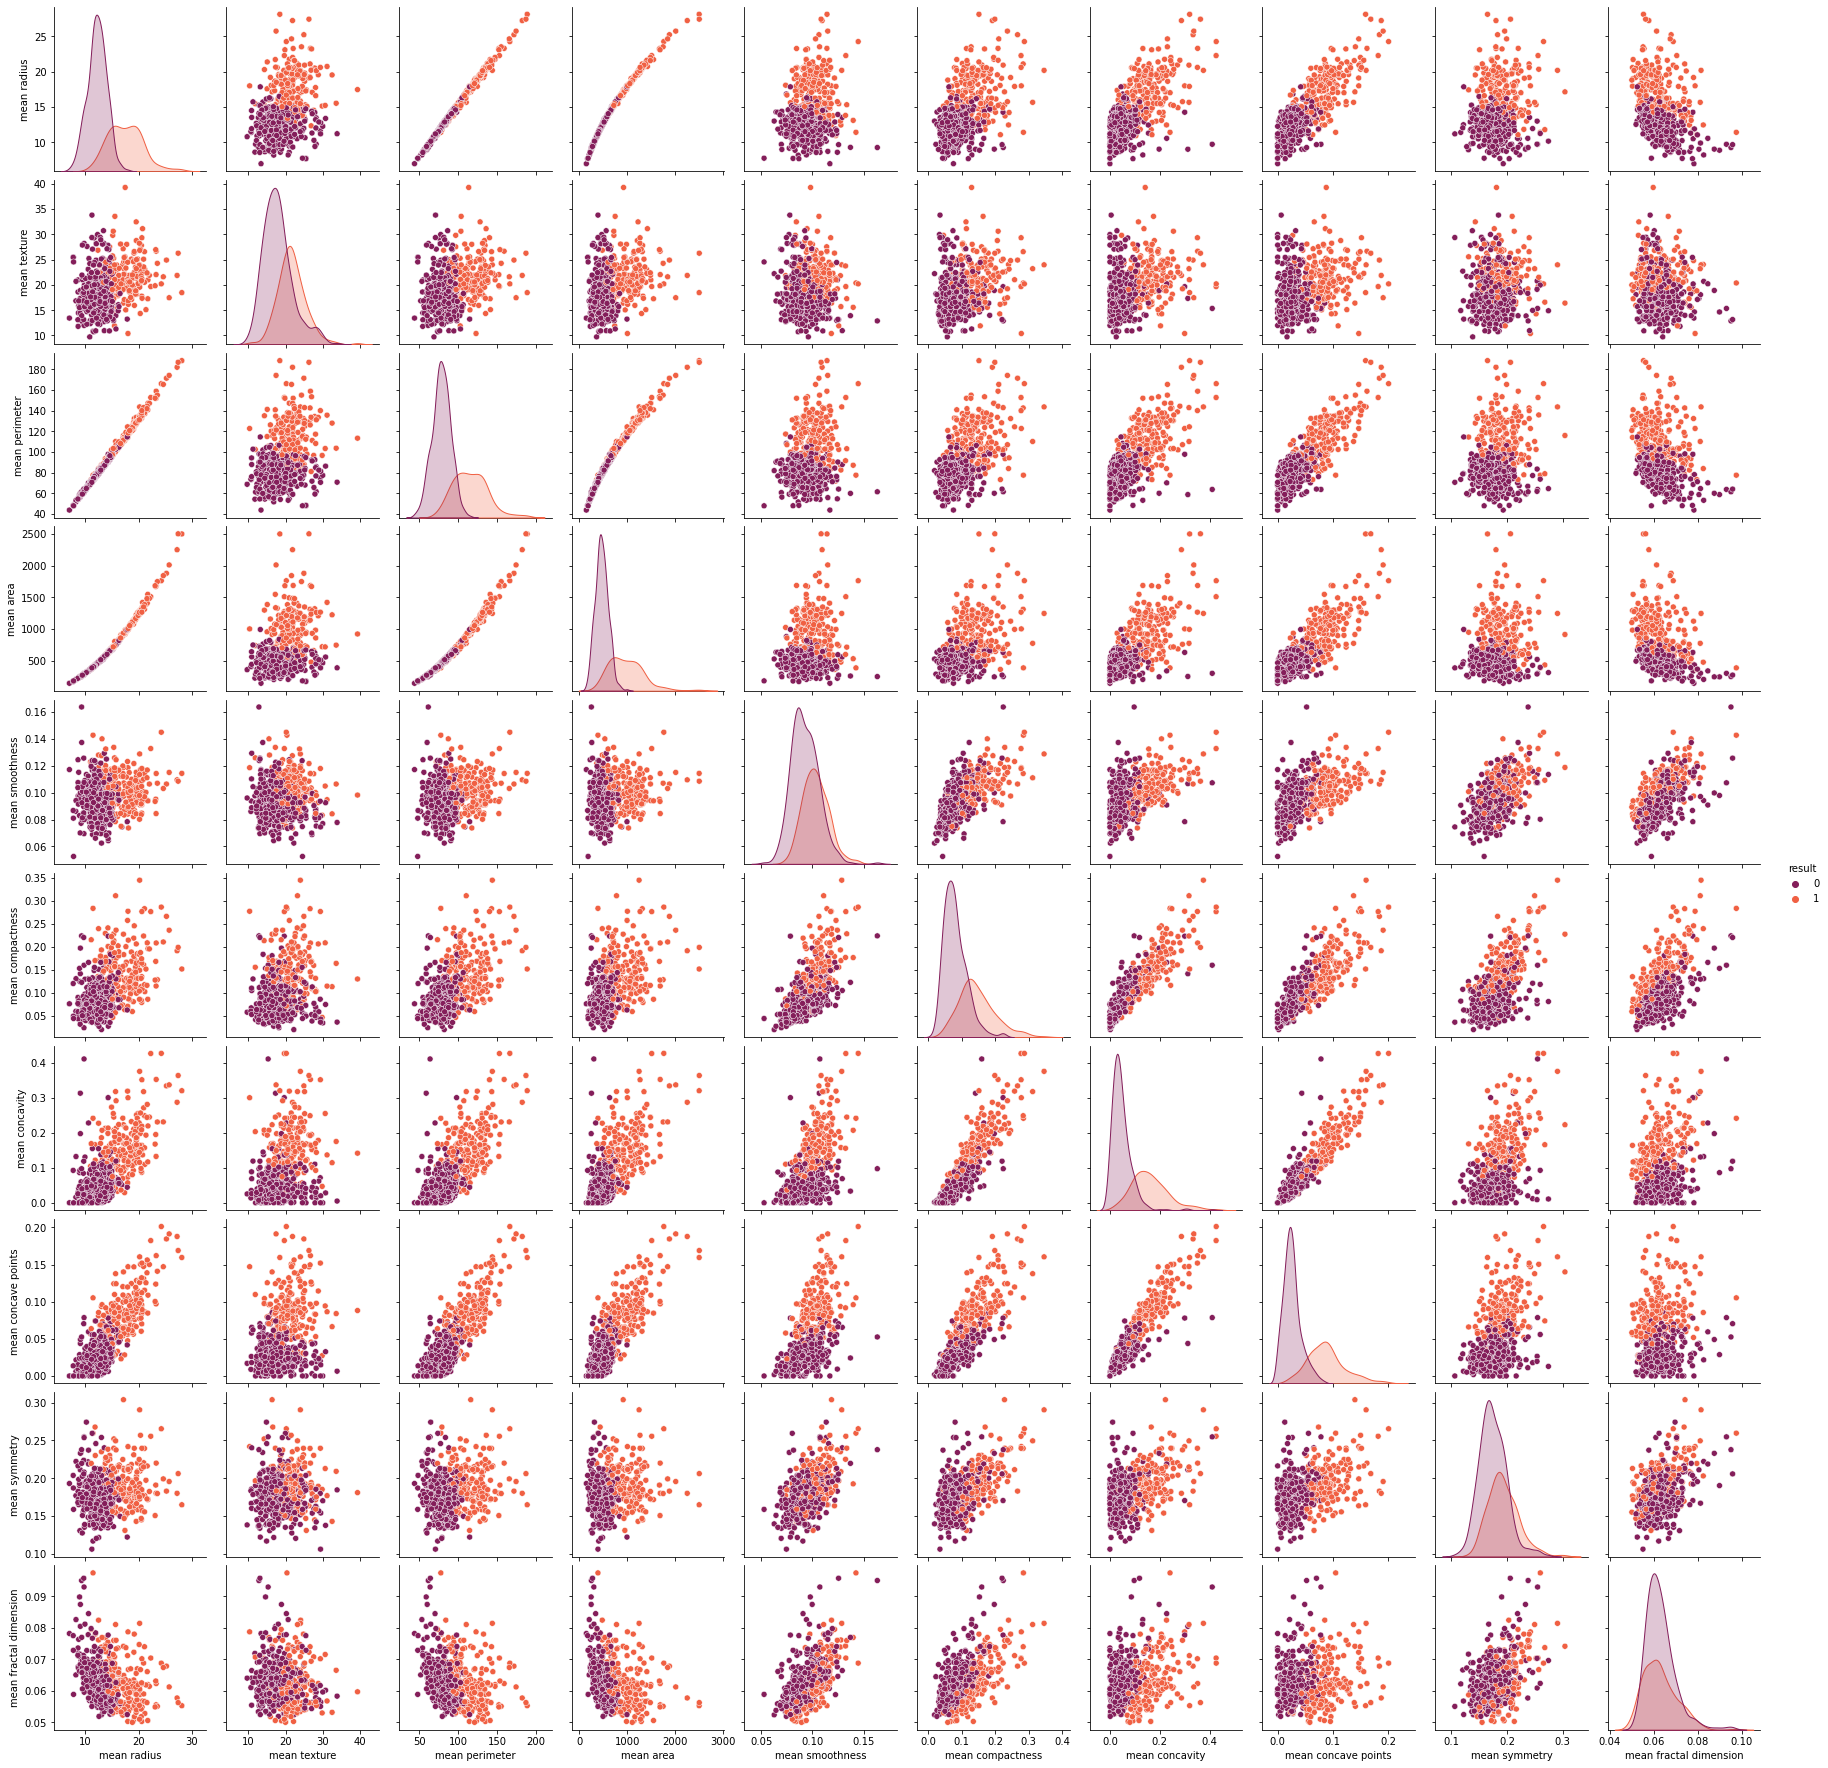

In [145]:
#selection of important columns from 'brc_df'
cols = [
    'result',
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry',
    'mean fractal dimension',   
]
sns.pairplot(data=brc_df[cols], hue='result', palette='rocket')

***
# <font color='green'> Creating and Training Model </font>
## 1. Define som important Libs

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. Define X and Y Variables

In [147]:
#X = brc.data
#Y = brc.target

## 3. Define and Split Train and Test datas

In [148]:
#Defining 'df_y' as Target with 'result' key from 'brc_df'
df_y = brc_df['result']

#Deleting 'result' col from dataframe
brc_df.drop('result',axis=1,inplace=True);

In [149]:
#Make sure that 'result' has been deleted from 'data' variable
brc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [150]:
df_x = brc_df
#split x and y values for train and test
x_train, x_test , y_train , y_test = train_test_split(df_x, df_y, test_size=0.3, random_state= 55)

## 4. Creating and Training Logistic Regression Model
### a. Ceate Model

In [151]:
LReg = LogisticRegression(max_iter=5000)

### b. Train The Model

In [152]:
#Train the model
LReg.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

### c. Checking 'coef_' and 'intercept_' of Model

In [153]:
print(LReg.coef_)

[[-0.90944579 -0.32916995  0.37892909 -0.03217221  0.12786765  0.24530849
   0.42216017  0.23335686  0.24145518  0.03969364  0.1248237  -0.51751915
   0.17352645  0.04176749  0.01454701 -0.00721264  0.03198617  0.02571977
   0.05358797 -0.00408351  0.0681478   0.46033156  0.04603511  0.01966076
   0.25189219  0.77388979  1.03489785  0.44790903  0.68859799  0.10073632]]


In [154]:
print(LReg.intercept_)

[-32.01614324]


### d. Checking Learning Score of Model

In [155]:
LReg.score(x_train,y_train)

0.964824120603015

### e. Using Model for Prediction on Test Data

In [156]:
#Prediction on test data
y_pred = LReg.predict(x_test)
print(y_pred)

[1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0]


### f. Calculating MSE of Model with 2 diffrent methods

In [157]:
np_meanSqu = np.mean((y_pred - y_test)**2)
sk_meanSqu = mean_squared_error(y_test,y_pred)

In [161]:
print("NP MSE = ", np_meanSqu , "\nSK MSE = ", sk_meanSqu)

NP MSE =  0.05847953216374269 
SK MSE =  0.05847953216374269
